# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the Data
df=pd.read_csv('kerala.csv')
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [3]:
df = df.drop(columns=['SUBDIVISION'])

# K Fold 

In [4]:
x=df.iloc[:, 0:-1]
y=df.iloc[:, -1]

In [5]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9722222222222222

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=3)
print(score_rf)
print("avg:",np.average(score_rf))

[0.975      0.94871795 0.94871795]
avg: 0.9574786324786325


In [10]:
#parameter tuning

In [11]:
scores1=cross_val_score(RandomForestClassifier(n_estimators=5),x,y,cv=10)
print("avg n estimator 5, cv 10:",np.average(scores1))

avg n estimator 5, cv 10: 0.9325757575757574


In [12]:
scores1=cross_val_score(RandomForestClassifier(n_estimators=10),x,y,cv=10)
print("avg n estimator 10, cv 10:",np.average(scores1))

avg n estimator 10, cv 10: 0.9742424242424242


In [13]:
scores1=cross_val_score(RandomForestClassifier(n_estimators=20),x,y,cv=10)
print("avg n estimator 20, cv 10:",np.average(scores1))

avg n estimator 20, cv 10: 0.9825757575757574


In [14]:
scores1=cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=10)
print("avg n estimator 40, cv 10:",np.average(scores1))

avg n estimator 40, cv 10: 0.9742424242424242


# Bagging

In [15]:
x = df.drop("FLOODS", axis="columns")
y = df.FLOODS

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:3] # it print first Three Rows of our dataset which are scaled

array([[-1.71743408,  1.06965812,  1.77919877,  0.49871595,  1.11757662,
        -0.36716643,  0.93306799,  0.19638772, -0.40213238, -0.3996229 ,
        -0.28194592,  2.27514032,  0.22975198,  0.71781316],
       [-1.68807624, -0.35816607, -0.79783302,  0.68912087, -0.59469339,
        -0.64078056, -1.40631479,  2.22255591, -0.63225503,  2.02162871,
         0.69868421, -0.04841464,  2.23136253,  0.8910505 ],
       [-1.65871839, -0.58531992,  0.18156148, -1.12139608, -0.60144347,
         0.14330768, -0.50173906,  1.42217561, -0.05612063,  0.7875236 ,
         0.65259995, -0.06410618,  0.5199992 ,  0.76800757]])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, stratify=y,random_state=256)

print('shape of x_train', x_train.shape)

print('shape of y_train', y_train.shape)

print('shape of x_test', x_test.shape)


shape of x_train (88, 14)
shape of y_train (88,)
shape of x_test (30, 14)


In [18]:
y_train.value_counts()


FLOODS
YES    45
NO     43
Name: count, dtype: int64

In [19]:
43/45

0.9555555555555556

In [20]:
y_test.value_counts()

FLOODS
NO     15
YES    15
Name: count, dtype: int64

In [21]:
15/15

1.0

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores=cross_val_score(DecisionTreeClassifier(), x,y,cv=5)
scores

array([1.        , 1.        , 1.        , 0.95652174, 0.95652174])

In [23]:
scores.mean()

0.9826086956521738

In [24]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train, y_train)
bag_model.oob_score_

0.9886363636363636

In [25]:
bag_model.score(x_test,y_test)

0.9333333333333333

In [26]:
scores.mean()

0.9826086956521738

In [27]:
bag_model=BaggingClassifier(
          base_estimator=DecisionTreeClassifier(),
          n_estimators=100,
          max_samples=0.8,
          oob_score=True,
          random_state=0)
scores=cross_val_score(bag_model, x,y, cv=5)
scores

array([1.        , 1.        , 1.        , 0.95652174, 0.95652174])

In [28]:
from sklearn.ensemble import RandomForestClassifier
scores=cross_val_score(RandomForestClassifier(n_estimators=50), x,y, cv=5)
scores.mean()

0.9826086956521738

#  Label Encoding


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df["FLOODS"])

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1])

In [30]:
df["FLOODS"]=le.fit_transform(df["FLOODS"])
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


# Split the data

In [31]:
x=df.drop('FLOODS',axis=1)
y=df['FLOODS']
print('shape of x',x.shape)
print('shape of y',y.shape)

shape of x (118, 14)
shape of y (118,)


#  Apply the train test model

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.50,random_state=31)

print('shape of x_train', x_train.shape)

print('shape of y_train', y_train.shape)

print('shape of x_test', x_test.shape)

print('shape of y_test', y_test.shape)

shape of x_train (59, 14)
shape of y_train (59,)
shape of x_test (59, 14)
shape of y_test (59,)


# Applying Random Forsest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
classifier=RandomForestClassifier(n_estimators=100,criterion='gini')
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
classifier.score(x_test,y_test)

0.9830508474576272

In [36]:
flud1=[1901,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7]

In [37]:
flud1=np.array([flud1])
flud1

array([[1.9010e+03, 2.3700e+01, 3.0000e+00, 3.2200e+01, 7.1500e+01,
        2.3570e+02, 1.0982e+03, 7.2550e+02, 3.5180e+02, 2.2270e+02,
        3.2810e+02, 3.3900e+01, 3.3000e+00, 3.1297e+03]])

In [38]:
classifier.predict(flud1)

array([1])

In [39]:
#Prediction 

In [40]:
pred=classifier.predict(flud1)

if pred[0]==0:
    print('No Flood')
else:
    print('Yes Flood')

Yes Flood


# Applying Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
regressor=RandomForestRegressor(n_estimators=100,criterion='squared_error')
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
regressor.score(x_test,y_test)

0.9512774193548388

In [44]:
regressor_100=RandomForestRegressor(n_estimators=500,criterion='squared_error')
regressor_100.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [45]:
regressor_100.score(x_test,y_test)

0.9507241244239631

In [46]:
x_test.iloc[-1, :]

YEAR                1910.0
JAN                    2.7
FEB                   25.7
MAR                   23.3
APR                  124.5
MAY                  148.8
JUN                  680.0
JUL                  484.1
AUG                  473.8
SEP                  248.6
OCT                  356.6
NOV                  280.4
DEC                    0.1
 ANNUAL RAINFALL    2848.6
Name: 9, dtype: float64

In [47]:
regressor.predict([x_test.iloc[-1, :]])

array([0.01])

In [48]:
y_test.iloc[-1]

0

In [49]:
y_pred=regressor.predict(x_test)
y_pred



array([0.  , 0.05, 0.05, 0.74, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.01, 0.88, 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 1.  , 0.  , 0.88, 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 0.74, 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.74,
       1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.01])

In [50]:
y_test

116    0
63     0
13     0
100    0
78     0
45     1
69     0
109    1
17     0
64     0
95     0
94     0
15     1
101    0
97     1
36     0
0      1
3      1
91     1
8      1
59     1
66     0
37     0
104    1
7      0
39     1
34     0
48     1
2      1
33     0
96     1
79     0
21     1
83     0
14     1
38     1
20     0
60     1
22     1
56     1
47     1
89     0
110    1
53     1
19     1
74     1
85     0
30     1
71     0
67     1
115    0
55     0
50     0
43     0
107    0
88     0
61     1
4      0
9      0
Name: FLOODS, dtype: int32

# Data Visualization

<Axes: >

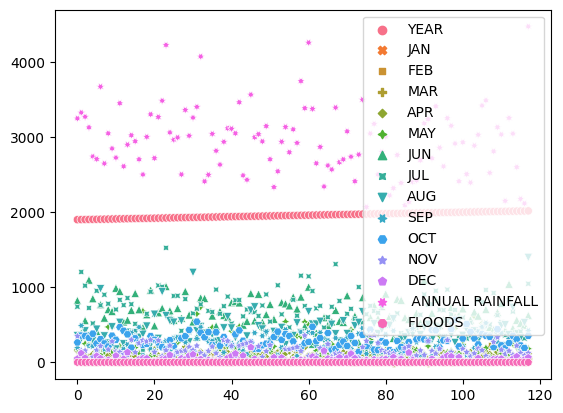

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(df)

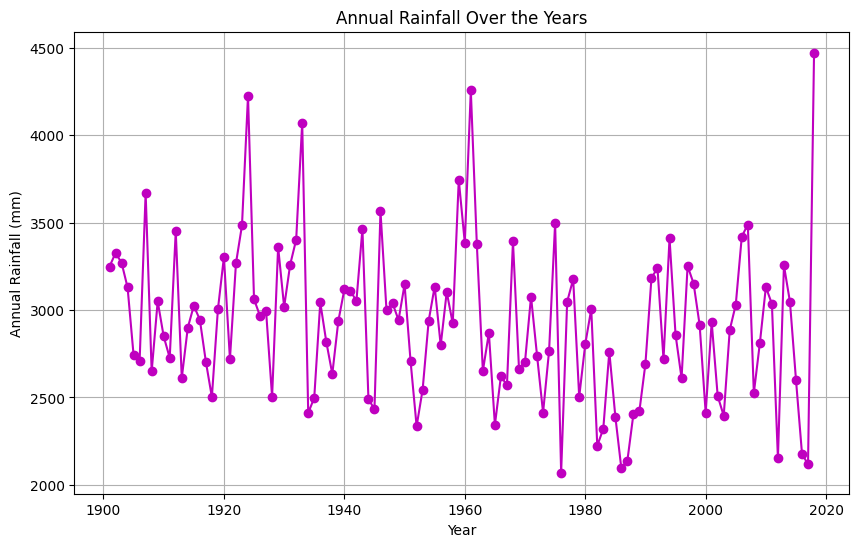

In [52]:
# Line Plot: Annual Rainfall Over the Years
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df[' ANNUAL RAINFALL'], marker='o',color='m')
plt.title('Annual Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(True)
plt.show()

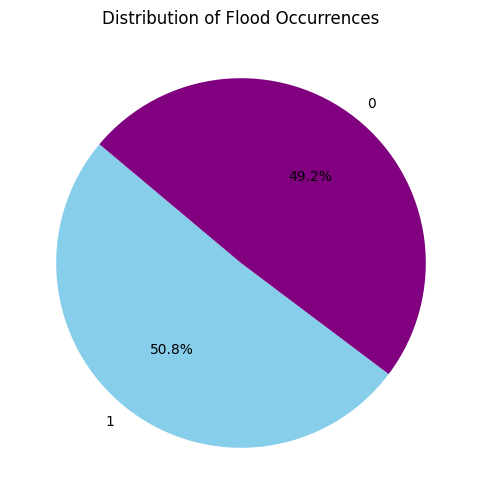

In [53]:
# Pie Chart: Distribution of Floods
flood_counts = df['FLOODS'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(flood_counts, labels=flood_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'purple'])
plt.title('Distribution of Flood Occurrences')
plt.show()

<Axes: xlabel='YEAR', ylabel='AUG'>

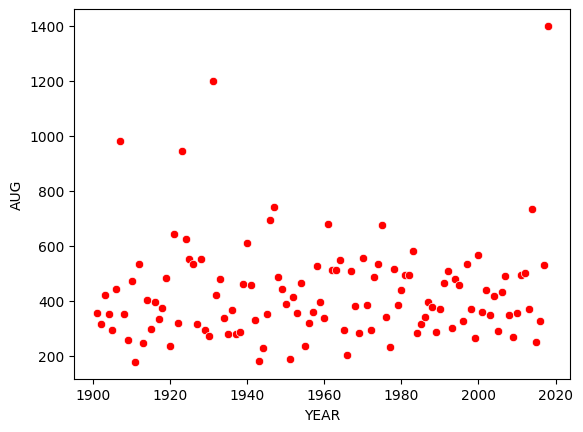

In [54]:
sns.scatterplot(x="YEAR",y="AUG",data=df,color='red')

<Axes: >

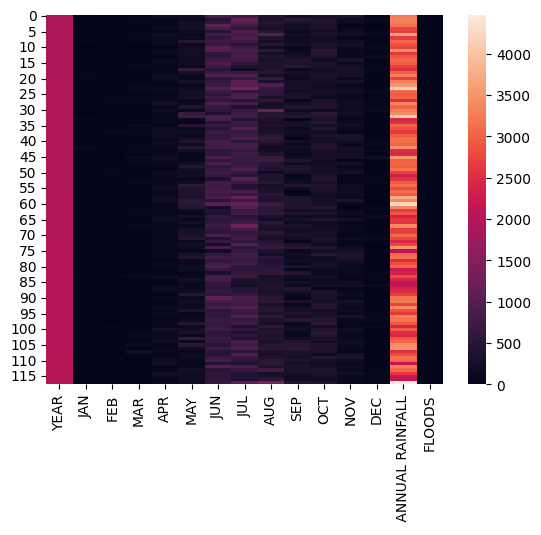

In [55]:
sns.heatmap(df)

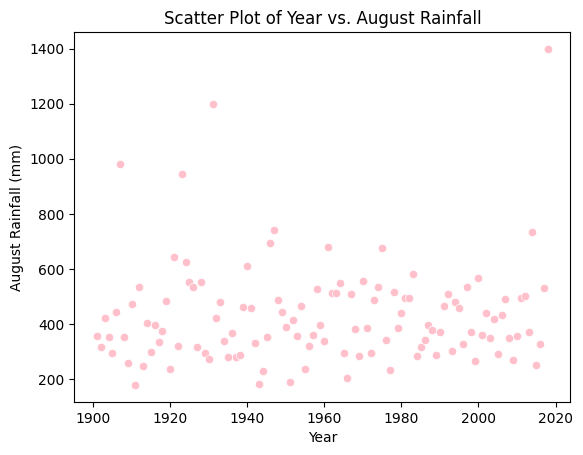

In [56]:
sns.scatterplot(x="YEAR", y="AUG", data=df,color='pink')
plt.title('Scatter Plot of Year vs. August Rainfall')
plt.xlabel('Year')
plt.ylabel('August Rainfall (mm)')
plt.show()

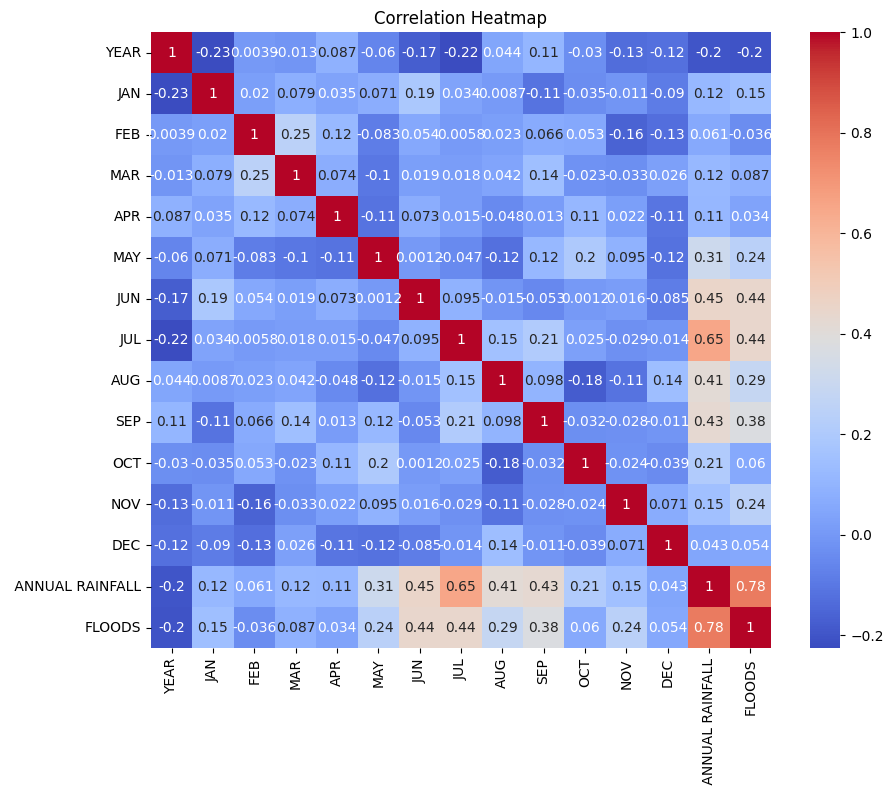

In [57]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

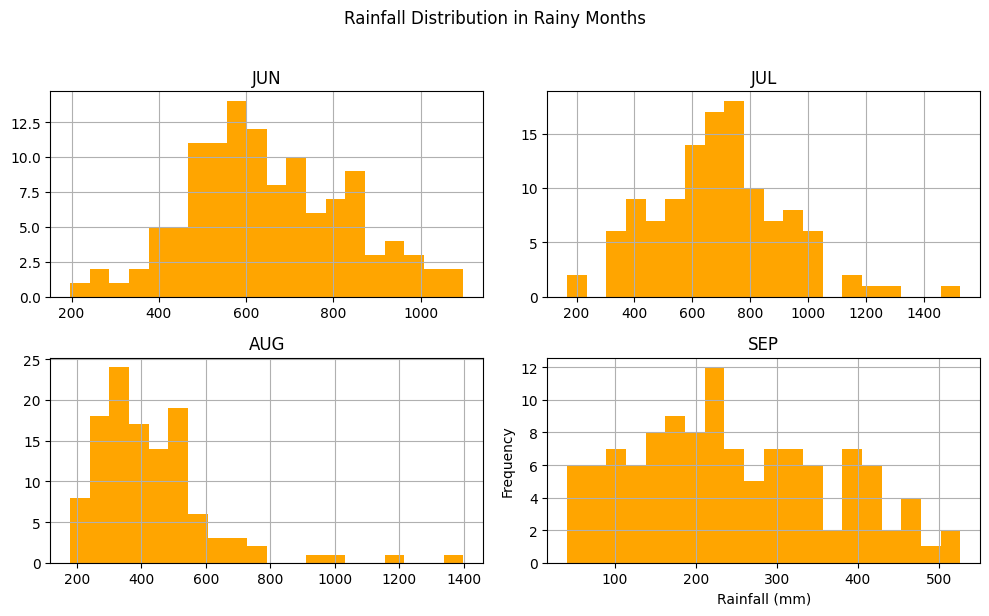

In [58]:
rainfall_months = ['JUN', 'JUL', 'AUG', 'SEP']
rainfall_data = df[rainfall_months]

rainfall_data.hist(bins=20, figsize=(10, 6),color='orange')
plt.suptitle('Rainfall Distribution in Rainy Months', y=1.02)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'JAN'}>, <Axes: title={'center': 'FEB'}>,
        <Axes: title={'center': 'MAR'}>],
       [<Axes: title={'center': 'APR'}>, <Axes: title={'center': 'MAY'}>,
        <Axes: title={'center': 'JUN'}>, <Axes: title={'center': 'JUL'}>],
       [<Axes: title={'center': 'AUG'}>, <Axes: title={'center': 'SEP'}>,
        <Axes: title={'center': 'OCT'}>, <Axes: title={'center': 'NOV'}>],
       [<Axes: title={'center': 'DEC'}>,
        <Axes: title={'center': ' ANNUAL RAINFALL'}>,
        <Axes: title={'center': 'FLOODS'}>, <Axes: >]], dtype=object)

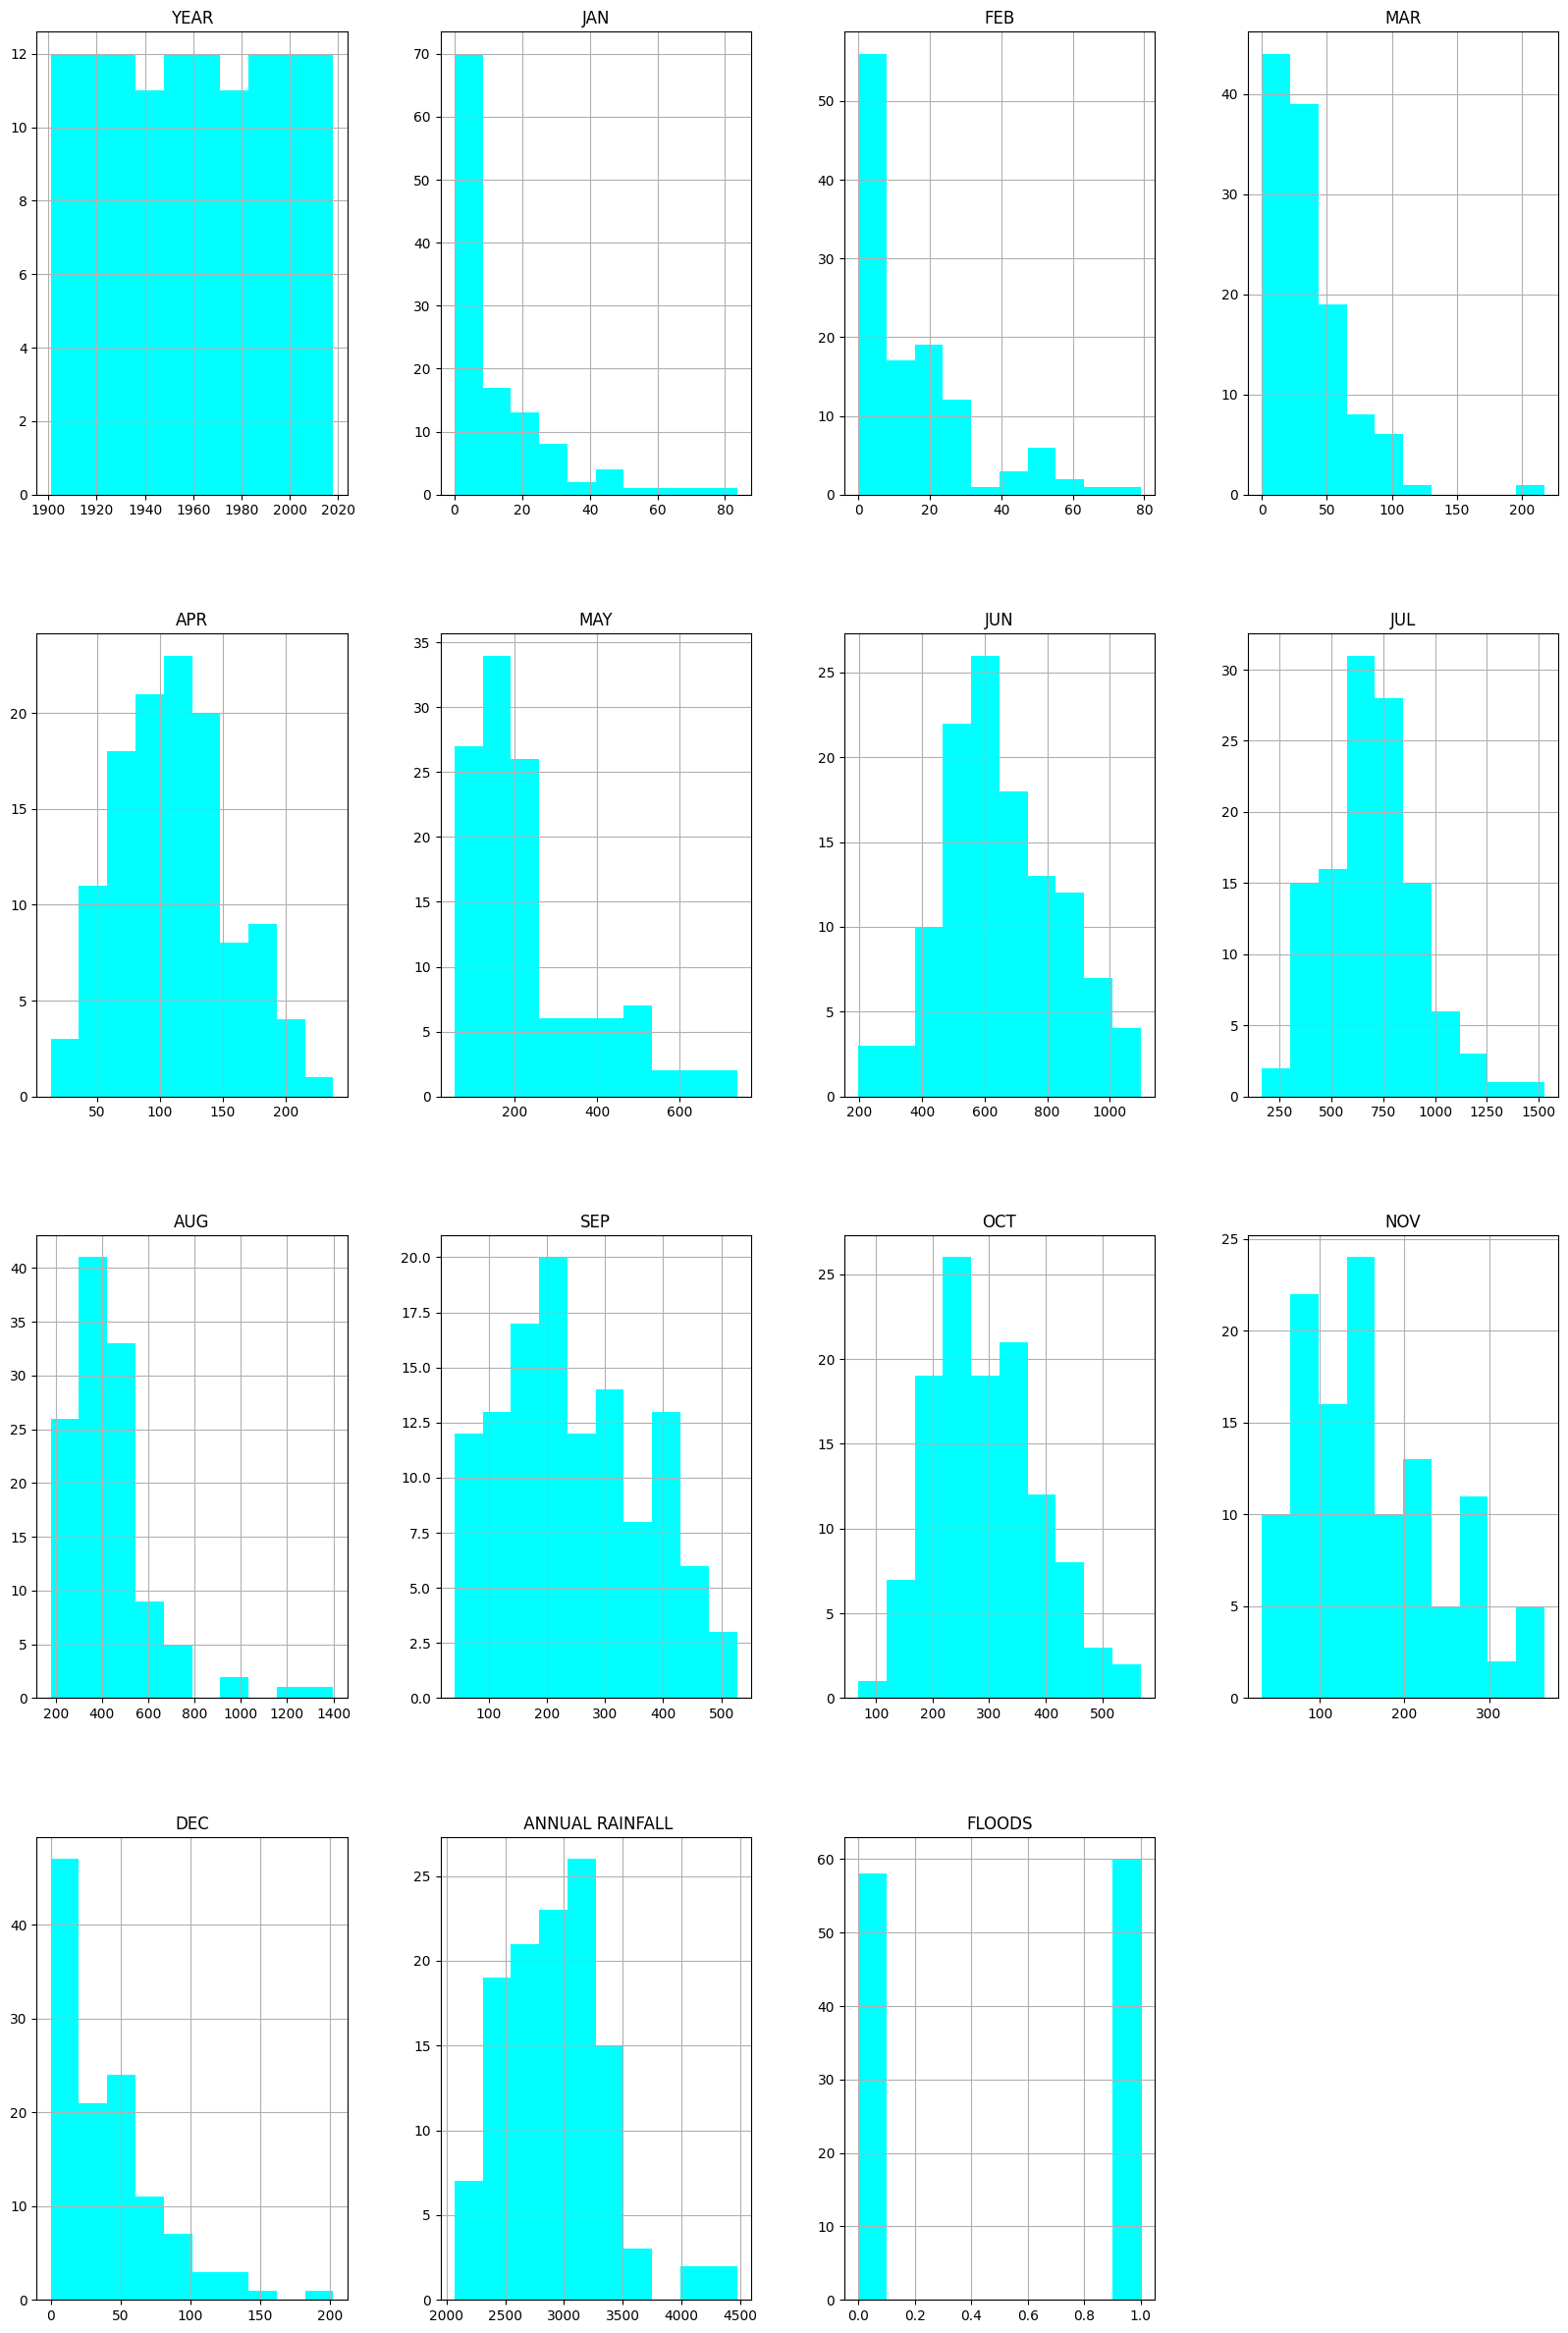

In [59]:
df.hist(figsize=(20,30),color='cyan')